In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_generation_target(eval_set, model):
    with open(f'/Users/tonysun/google/tony-sun-intern-project/evaluation/{eval_set}/generations/{model}/generation.txt', 'r') as f:
        generation = f.readlines()
    
    with open(f'/Users/tonysun/google/tony-sun-intern-project/evaluation/{eval_set}/target.txt', 'r') as f:
        target = f.readlines()
        
    return generation, target

In [4]:
generation, target = get_generation_target(eval_set='gendered_test_set', model='model_full')

In [5]:
len(generation), len(target)

(500, 500)

In [7]:
generation[-1], target[-1]

("man's business trip is cancelled and they are at home with a rather nervous wife.\n",
 "man's business trip is cancelled and they are at home with a rather nervous wife.\n")

In [11]:
def eval_full(model):
    y_label, y_pred = list(), list()
    
    gendered_generation, gendered_target = get_generation_target(eval_set='gendered_test_set', model=model)
    nongendered_generation, nongendered_target = get_generation_target(eval_set='nongendered_test_set', model=model)
    
    for generation, target in zip(gendered_generation, gendered_target):
        y_label.append(True)
        y_pred.append(generation == target)
    
    for generation, target in zip(nongendered_generation, nongendered_target):
        y_label.append(False)
        y_pred.append(generation != target)
    
    return y_label, y_pred

In [51]:
y_label, y_pred = eval_full(model='model_full')

In [52]:
cm = confusion_matrix(y_label, y_pred)
tn, fp, fn, tp = cm.ravel()

In [53]:
cm

array([[478,  22],
       [ 62, 438]])

In [54]:
tn, fp, fn, tp

(478, 22, 62, 438)

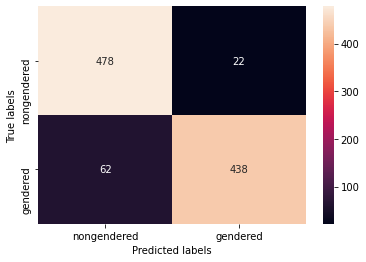

In [55]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='d');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

ax.xaxis.set_ticklabels(['nongendered', 'gendered']);
ax.yaxis.set_ticklabels(['nongendered', 'gendered']);

In [56]:
prec = tp / (tp + fp)
recall = tp / (tp + fn)
acc = (tp + tn) / (tp + tn + fp + fn)

In [57]:
print(f'precision: {round(prec, 3)}')
print(f'recall: {round(recall, 3)}')
print(f'accuracy: {round(acc, 3)}')

precision: 0.952
recall: 0.876
accuracy: 0.916
